In [11]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [13]:
help(gp2.KVNet2D)

Help on class KVNet2D in module gp2.gp2.classifiers.k_vnet2d:

class KVNet2D(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KVNet2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, res_num_ini=1, res_num_max=2, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=False, unpool=False, name='vnet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  KVNet2D for binary segmentation
 |  
 |  Method resolution order:
 |      KVNet2D
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, res_num_ini=1, res_num_max=2, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=False, unpool=False, name='vnet', optimizer=None, loss=None, metric=None, 

In [14]:
R = Runner(verbose=True,
           classifier='kvnet2d',
           discriminator='cnn',
           filter_num=[16, 32, 64, 128, 256],
           res_num_ini=1, 
           res_num_max=2, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=False, 
           unpool=False,
           optimizer=None, 
           loss=None, 
           metric=None,
          )

*** GP2  KVNet2D ***
Working directory: /tmp/tmpd0resurkGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmpd0resurkGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128, 256], 'n_labels': 1, 'res_num_ini': 1, 'res_num_max': 2, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': False, 'unpool': False, 'name': 'vnet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f9cf11e0b20>, 'loss': <function binary_crossentropy at 0x7f9d8ab48c10>, 'metric': [<function Util.dice_coeff at 0x7f9d8b460670>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f8cc2106a30>}
Model summary:
Model: "vnet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 1) 0                                           

In [15]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

In [16]:
images = images[:6000]
masks = masks[:6000]

In [17]:
images.shape

(6000, 512, 512, 1)

In [18]:
masks.shape

(6000, 512, 512, 1)

In [19]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [20]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 10s 2s/step - loss: 1.2399 - dice_coeff: 0.3952 - val_loss: 2.6475 - val_dice_coeff: 0.3256
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 1.0085 - dice_coeff: 0.4207 - val_loss: 3.4765 - val_dice_coeff: 0.3221
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.8627 - dice_coeff: 0.4389 - val_loss: 5.1394 - val_dice_coeff: 0.3182
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.7750 - dice_coeff: 0.4522 - val_loss: 6.5832 - val_dice_coeff: 0.3162
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.7110 - dice_coeff: 0.4667 - val_loss: 7.2718 - val_dice_coeff: 0.3163
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6657 - dice_coeff: 0.4816 - val_loss: 7.4304 - val_dice_coeff: 0.3177
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6355 - dice_coeff: 0.4920 - val_loss: 7.3572 - va

In [21]:
R.classifier_scores

[[0.8986756801605225, 0.4598231017589569],
 [0.49589967727661133, 0.5043867826461792],
 [0.38676050305366516, 0.5452563762664795],
 [0.3203839361667633, 0.5485392212867737],
 [0.30790042877197266, 0.5485397577285767],
 [0.29797691106796265, 0.5517064332962036]]

In [22]:
R.discriminator_scores

[[0.10757982730865479, 0.9916666746139526],
 [3.1409430503845215, 0.7222222089767456],
 [7.224101543426514, 0.5638889074325562],
 [6.990585803985596, 0.5638889074325562],
 [7.8798604011535645, 0.574999988079071],
 [24.044387817382812, 0.4888888895511627]]

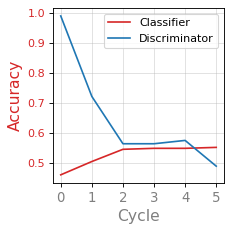

In [24]:
R.plot()